# Kickstarter Projects - Visualization and Prediction


<b>Visualization of Kickstarter Dataset using Pandas, Seaborn and Matplotlib .
This visualization helps us in understanding the features,gives us a deep insight into the dataset and in predicting the final result of a Kickstarter project. </b>

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
ks_project = pd.read_csv('ks-projects-201801.csv')

In [164]:
ks_project.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09-10-2015,1000.0,11-08-2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017 04:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26-02-2013,45000.0,12-01-2013 00:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16-04-2012,5000.0,17-03-2012 03:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29-08-2015,19500.0,04-07-2015 08:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [165]:
sns.set_style('darkgrid')
sns.set_palette('dark')

<b>Let us plot the number of the individual states ( Successful, Failed, Live, Undefined, Suspended )

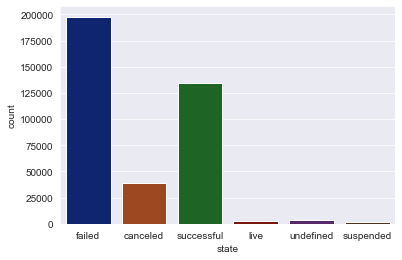

In [166]:
sns.countplot(x='state',data=ks_project)

<b> This heapmap shows that there are no null values in any of the columns of the dataset </b>

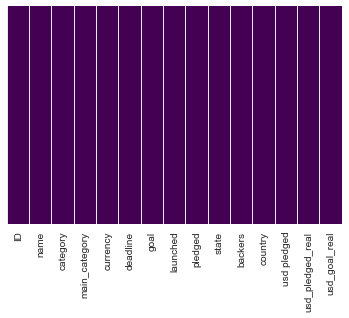

In [167]:
sns.heatmap(ks_project.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<b>This countplot shows the top 5 countries with highest kickstarter submissions </b>

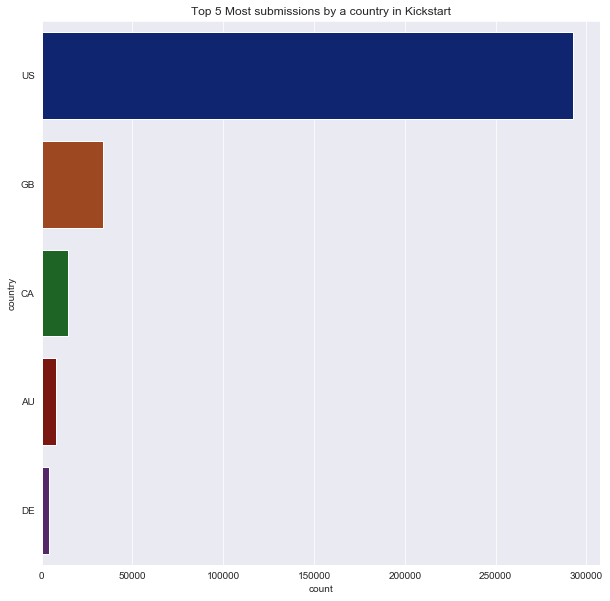

In [168]:
plt.figure(figsize=(10,10))
sns.countplot(data=ks_project,y="country",order=ks_project.country.value_counts().iloc[:5].index)
plt.title('Top 5 Most submissions by a country in Kickstart')
plt.show()

In [169]:
#USA has the highest number of submissions!

<b>This countplot shows the top 5 countries with highest successful kickstarter submissions </b>

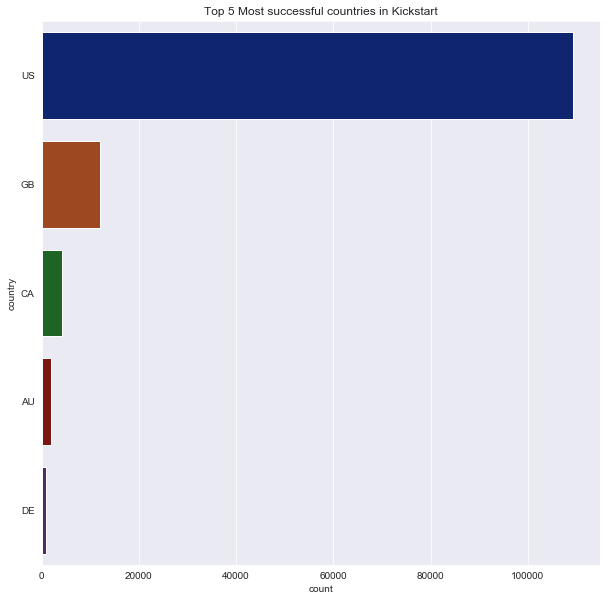

In [170]:
plt.figure(figsize=(10,10))
sns.countplot(data=ks_project[ks_project["state"]=="successful"],y="country",order=ks_project.country.value_counts().iloc[:5].index)
plt.title('Top 5 Most successful countries in Kickstart')
plt.show()

In [171]:
#USA has the highest successful submissions

<b>Main Categories and their State in Kickstarters</b>

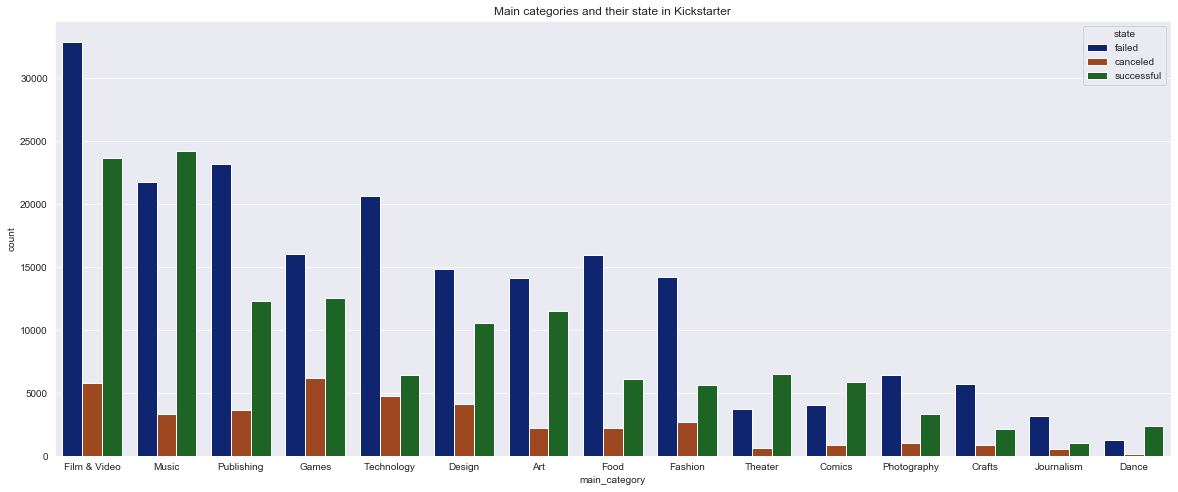

In [172]:
plt.figure(figsize=(20,8))
plt.title('Main categories and their state in Kickstarter')
sns.countplot(data=ks_project[(ks_project['state'] == "successful") | (ks_project['state']== "failed") |(ks_project['state']== "canceled")],x="main_category",order=ks_project.main_category.value_counts().iloc[:].index,hue="state")
plt.show()

In [173]:
#We can clearly notice that among all the projects, 'Films and Videos' have failed the most 
#while 'Music' and 'Film and Video' have had the most success.

<b>Count of all the main categories in Kickstarter </b>

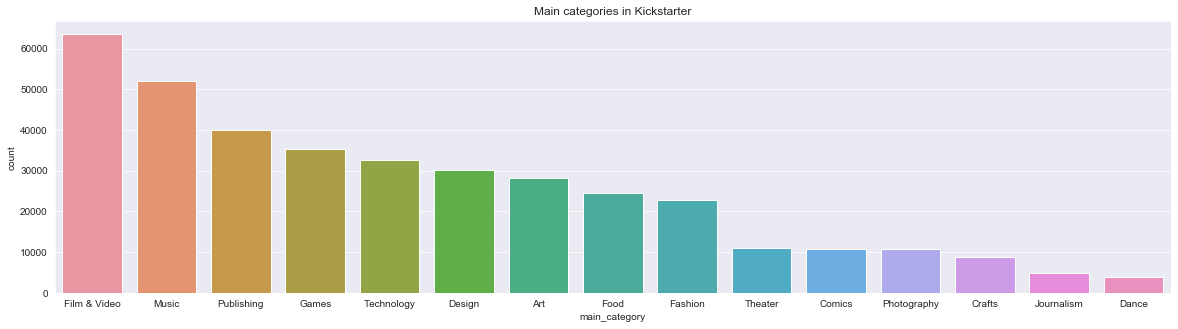

In [174]:
plt.figure(figsize=(20,5))
plt.title('Main categories in Kickstarter')
sns.countplot(data=ks_project,x="main_category",order=ks_project.main_category.value_counts().iloc[:].index)
plt.show()

<b>Strip plot between state and backers on the basis of category(main)</b>

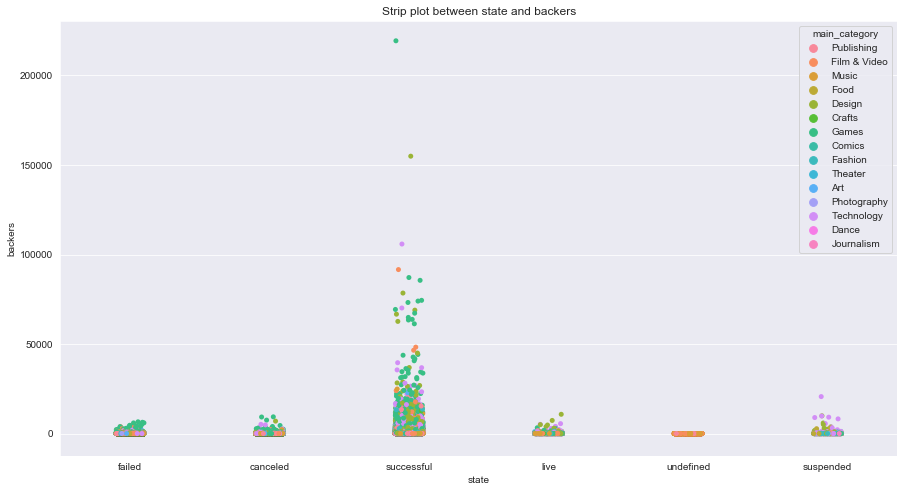

In [175]:
plt.figure(figsize=(15,8))
plt.title('Strip plot between state and backers')
sns.stripplot(x='state',y='backers',jitter=True,data=ks_project,hue='main_category');

In [176]:
#We can clearly see that most of the successful kickstarters are from music, games, technology or craft category.
#We can also notice most projects which are successful have backers in the range of 100 to 40,000

<b>Boxen Plot between goal and final state </b>

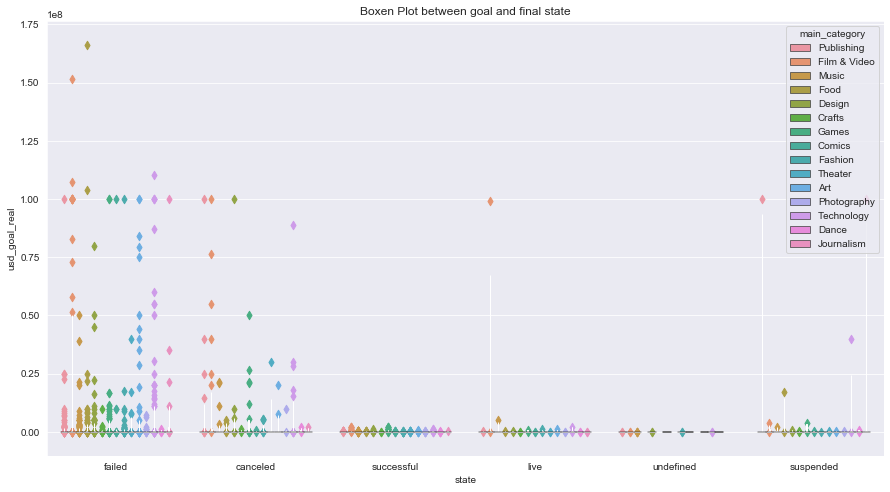

In [177]:
plt.figure(figsize=(15,8))
plt.title('Boxen Plot between goal and final state')
sns.boxenplot(x='state',y='usd_goal_real',data=ks_project,hue='main_category');

In [178]:
#Most of the failed/canceled projects expected a high amount of money to begin with.

<b>Boxenplot between pledged money and state </b>

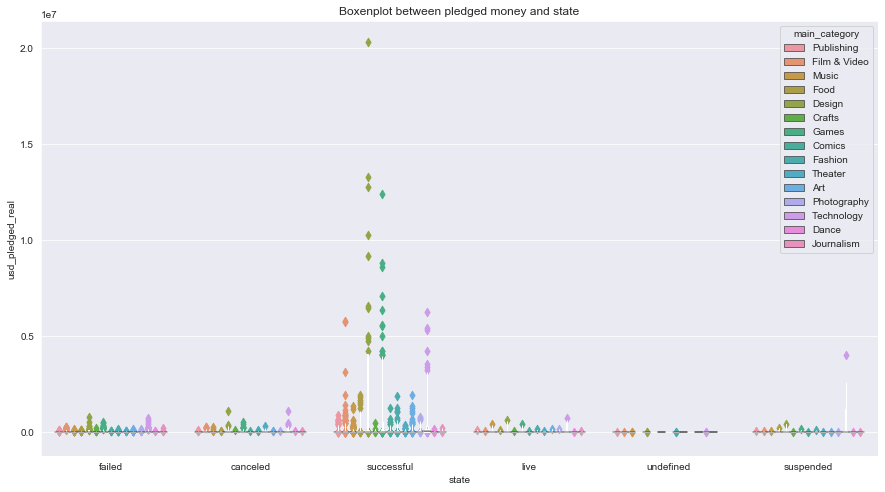

In [179]:
plt.figure(figsize=(15,8))
plt.title('Boxenplot between pledged money and state')
sns.boxenplot(x='state',y='usd_pledged_real',data=ks_project,hue='main_category')

In [183]:
#Projects related to games,fashion and technology raised the most amount of money

In [184]:
ks_project = ks_project[ks_project['state'] != 'live']

In [185]:
ks_project['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
suspended       1846
Name: state, dtype: int64

In [186]:
#Converting the categorical features into numerical features
def func(x):
    if x == 'failed':
        return 0
    elif x == 'canceled' or x == 'undefined' or x == 'suspended':
        return 1
    else:
        return 2
ks_project['state'] = ks_project['state'].apply(lambda x : func(x));

In [187]:
ks_project['state'].value_counts()

0    197719
2    133956
1     44187
Name: state, dtype: int64

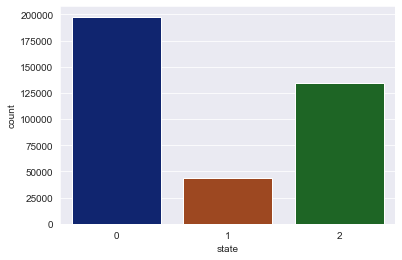

In [189]:
sns.countplot(x='state',data=ks_project)
#1 - Failed
#2 - Canceled
#3 - Successful

<b>Now we are converting the deadline and launch dates to use them in our feature vector! </b>

In [190]:
ks_project['deadline'] = pd.to_datetime(ks_project['deadline'])
ks_project['launched'] = pd.to_datetime(ks_project['launched'])

In [191]:
ks_project['deadline day'] = ks_project['deadline'].apply(lambda x : x.day)
ks_project['deadline month'] = ks_project['deadline'].apply(lambda x : x.month)
ks_project['deadline year'] = ks_project['deadline'].apply(lambda x : x.year)
ks_project['launched day'] = ks_project['launched'].apply(lambda x : x.day)
ks_project['launched month'] = ks_project['launched'].apply(lambda x : x.month)
ks_project['launched year'] = ks_project['launched'].apply(lambda x : x.year)

In [193]:
ks_project.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,deadline day,deadline month,deadline year,launched day,launched month,launched year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-09-10,1000.0,2015-11-08 12:12:00,0.0,0,...,GB,0.0,0.0,1533.95,10,9,2015,8,11,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-01-11,30000.0,2017-02-09 04:43:00,2421.0,0,...,US,100.0,2421.0,30000.00,11,1,2017,9,2,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-12-01 00:20:00,220.0,0,...,US,220.0,220.0,45000.00,26,2,2013,1,12,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:00,1.0,0,...,US,1.0,1.0,5000.00,16,4,2012,17,3,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-04-07 08:35:00,1283.0,1,...,US,1283.0,1283.0,19500.00,29,8,2015,7,4,2015


<b>Box plot between launched year of the project and its final state </b>

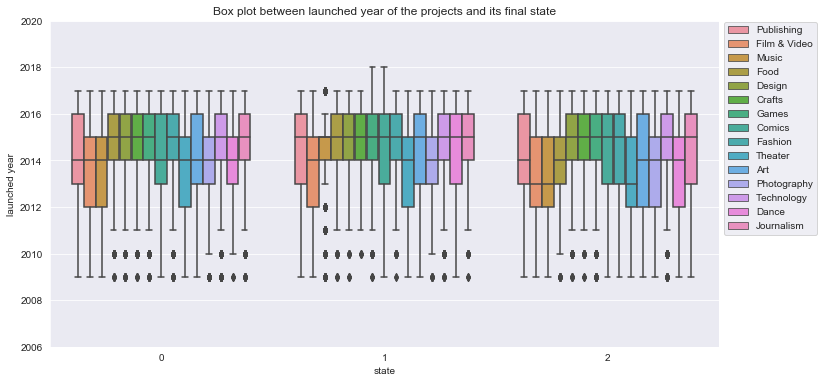

In [200]:
plt.figure(figsize=(12,6))
sns.boxplot(x='state',y='launched year',data=ks_project,hue='main_category')
plt.legend(loc='center left', bbox_to_anchor=(1.00, 0.67), ncol=1)
plt.title('Box plot between launched year of the projects and its final state')
plt.ylim(2006,2020);

In [201]:
#We can conclude that most of the project were launched between 2014 and 2016
#We can also conclude that craft, games and design projects launched near 2011 and were at peak
#(of launch) between 2014-2016

<b>Box plot between deadline year of the project and its final state</b>

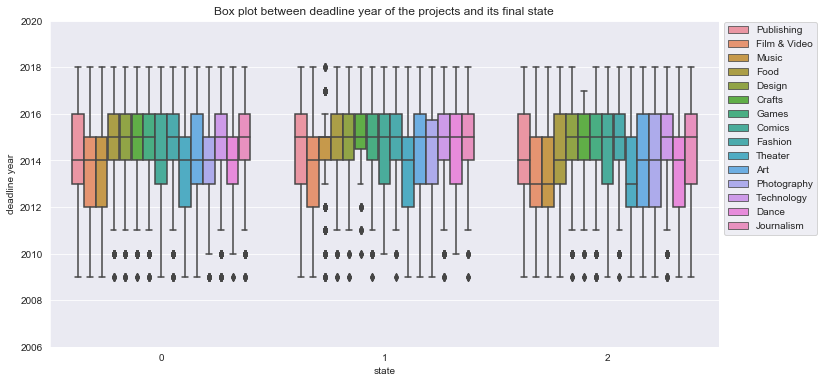

In [203]:
plt.figure(figsize=(12,6))
sns.boxplot(x='state',y='deadline year',data=ks_project,hue='main_category')
plt.title('Box plot between deadline year of the projects and its final state')
plt.legend(loc='center left', bbox_to_anchor=(1.00, 0.67), ncol=1)
plt.ylim(2006,2020);

<b>Bar plot between country and its goal </b>

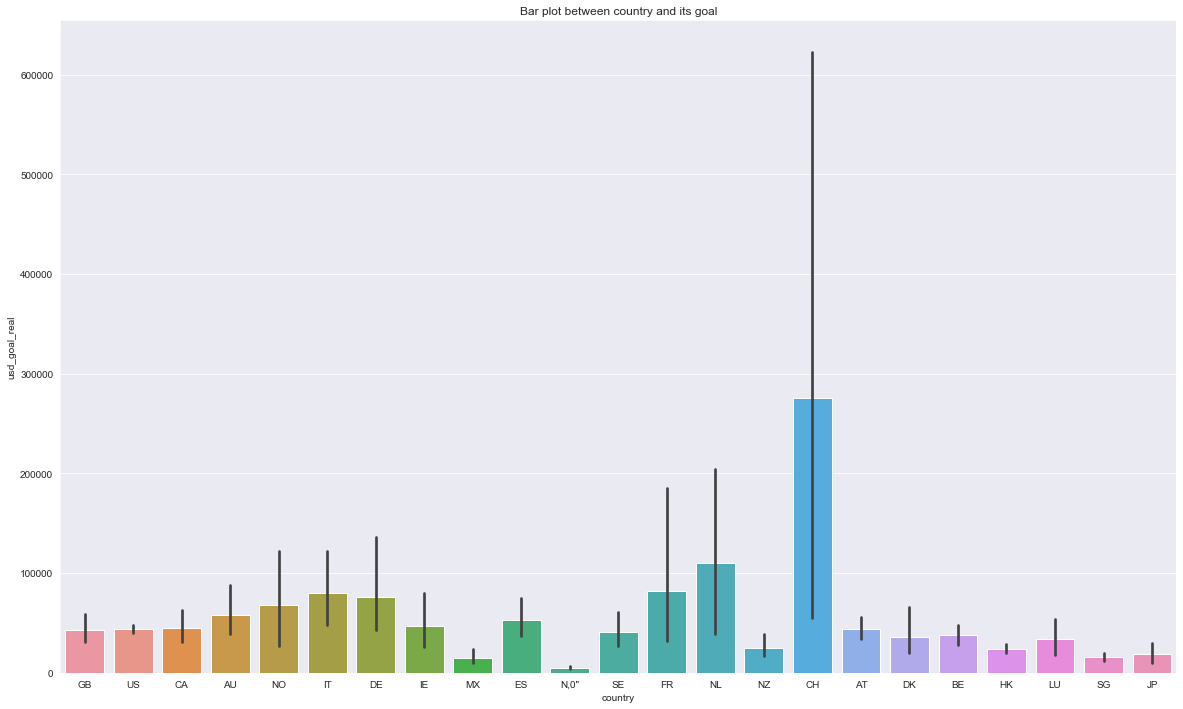

In [205]:
plt.figure(figsize=(20,12))
plt.title('Bar plot between country and its goal')
sns.barplot(x='country',y='usd_goal_real',data=ks_project)

In [207]:
#Switzerland(CH) has the highest expected goal because their projects must be more expensive to create!

<b>Bar plot between country and the pledged amount for the project </b>

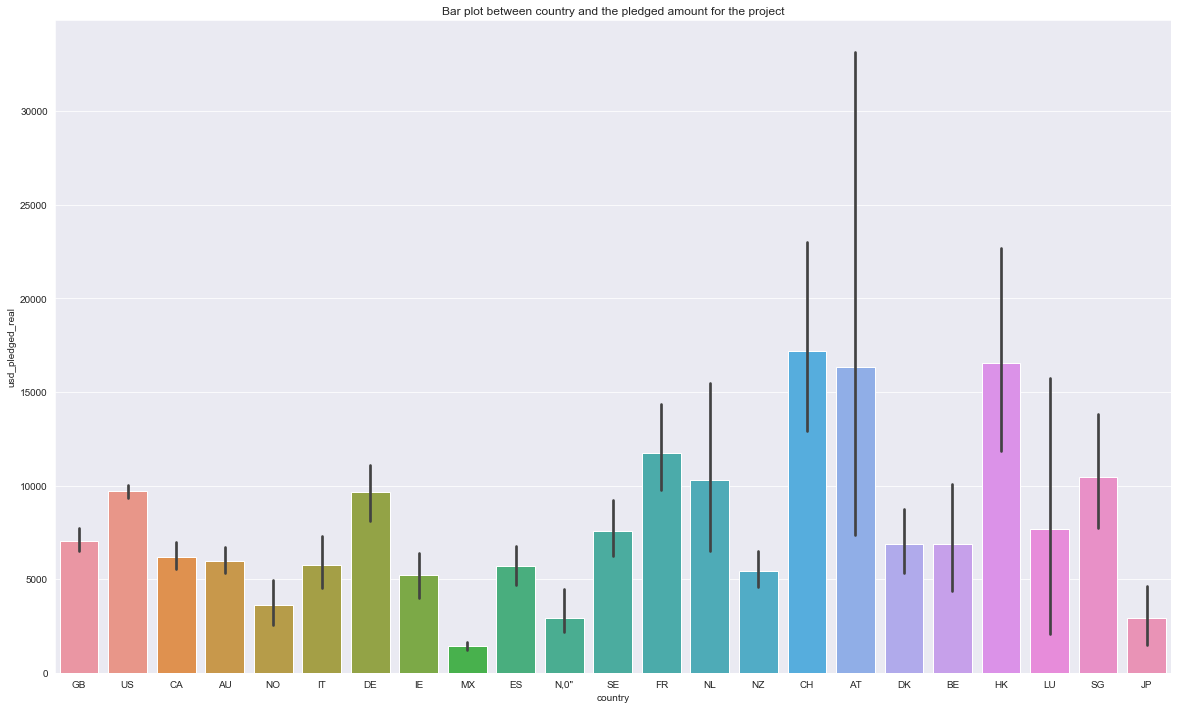

In [209]:
plt.figure(figsize=(20,12))
plt.title('Bar plot between country and the pledged amount for the project')
sns.barplot(x='country',y='usd_pledged_real',data=ks_project)

In [211]:
#Hong Kong has the most promising projects which accounts for the high pledged money

<b>Bar plot between country and the backers </b>

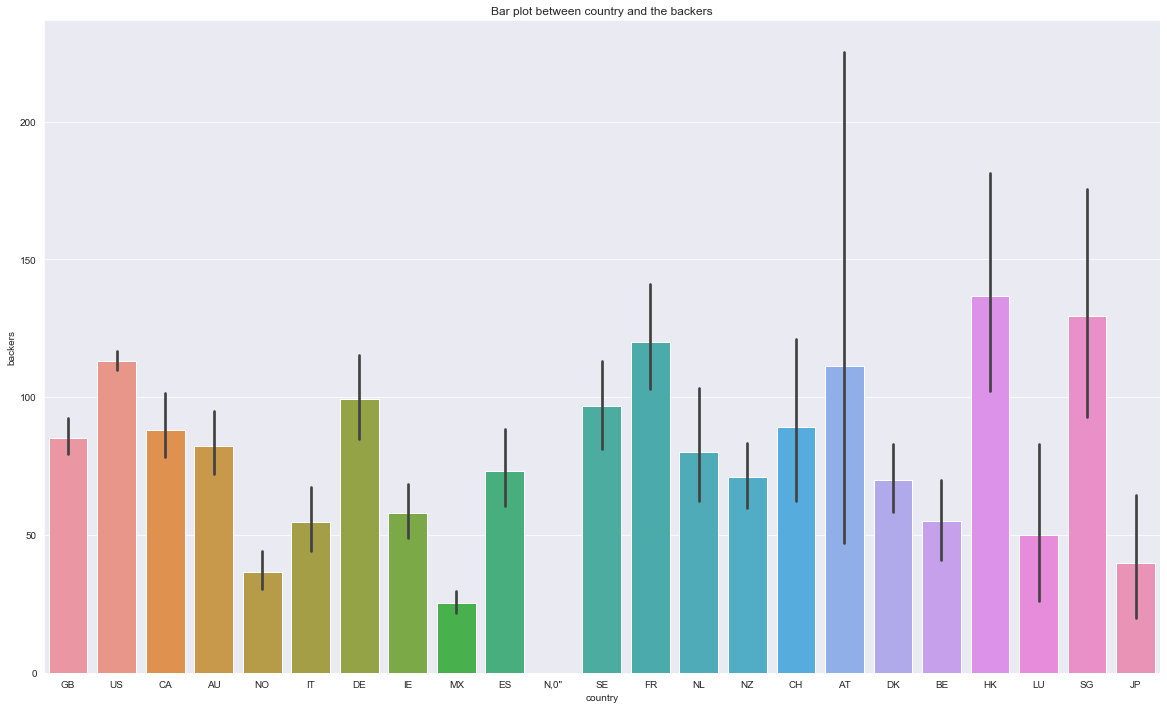

In [213]:
plt.figure(figsize=(20,12))
plt.title('Bar plot between country and the backers')
sns.barplot(x='country',y='backers',data=ks_project)

In [217]:
#Hong Kong has the highest number of backers!

<b>Bar plot between main category and the backers</b>

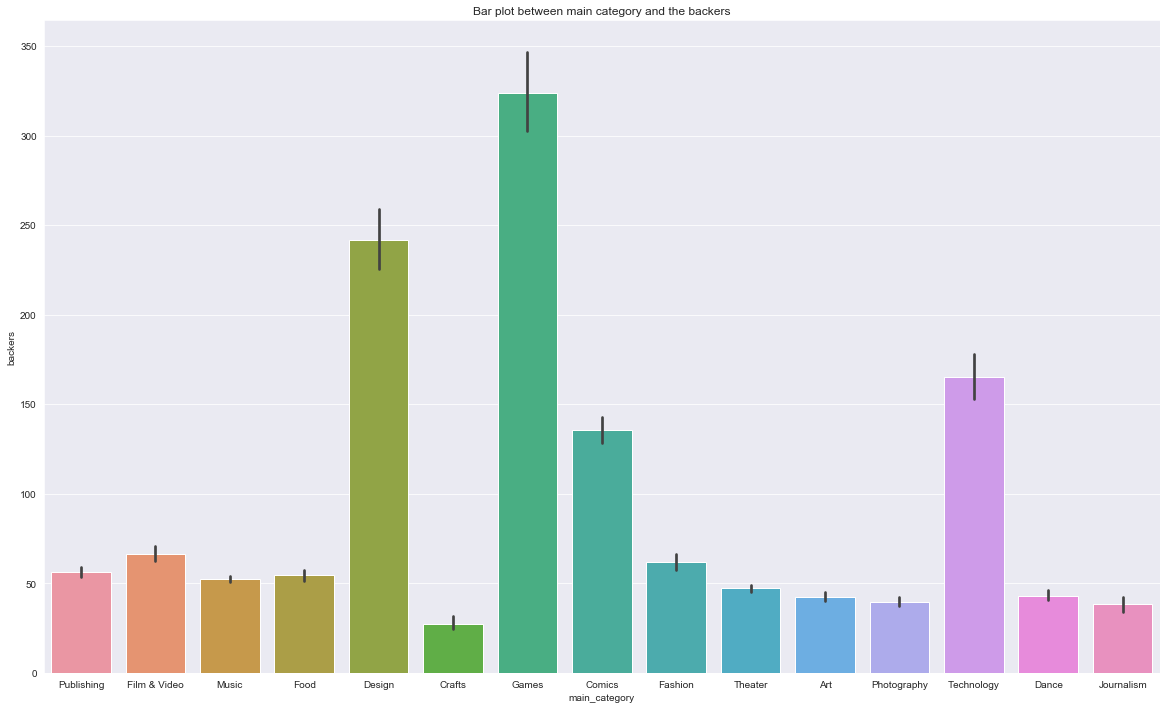

In [220]:
plt.figure(figsize=(20,12))
plt.title('Bar plot between main category and the backers')
sns.barplot(x='main_category',y='backers',data=ks_project);

In [219]:
#Games, design and technology attracts the most eyeballs!

# Predictions using Machine Learning Algorithms

In [ ]:
#Converting categorical features into indicator columns

In [84]:
categ = pd.get_dummies(ks_project['main_category'])
ctry = pd.get_dummies(ks_project['country'])
ks_project = pd.concat([ks_project,categ,ctry],axis=1)

In [ ]:
#Creating the feature vector X and the output vector y

In [85]:
X = ks_project.drop(['ID','name','category','main_category','currency'
                    ,'deadline','goal','launched','pledged','state','country','usd pledged'],axis=1)
y = ks_project['state']

In [ ]:
#Creating our test and train dataset

In [86]:
from sklearn.model_selection import train_test_split

In [221]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01)

# Logistic Regression

In [ ]:
#First we shall try to implement a simple model of logistic regression 

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
ks_model = LogisticRegression(max_iter = 5000)

In [90]:
ks_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
predictions = ks_model.predict(X_test)

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1965
           1       0.75      0.01      0.01       461
           2       0.90      1.00      0.95      1333

    accuracy                           0.85      3759
   macro avg       0.82      0.65      0.61      3759
weighted avg       0.84      0.85      0.80      3759



<b> We have obtained a F1 Score -  85% </b>

In [ ]:
#Scaling for better results!

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
scaler.fit(X)
scaled_features = scaler.transform(X)

In [98]:
scaled_X = pd.DataFrame(scaled_features,columns=X.columns)

In [99]:
scaled_X

,backers,usd_pledged_real,usd_goal_real,deadline day,deadline month,deadline year,launched day,launched month,launched year,Art,...,JP,LU,MX,"N,0""",NL,NO,NZ,SE,SG,US
0,-0.116376,-0.099514,-0.038219,-0.633039,0.722421,0.370927,-0.842421,1.363674,0.401503,-0.283486,...,-0.009082,-0.01274,-0.066301,-0.101007,-0.087147,-0.043196,-0.061929,-0.068138,-0.037471,-1.850191
1,-0.099892,-0.072988,-0.013376,-0.518729,-1.602435,1.420704,-0.727777,-1.288231,1.440338,-0.283486,...,-0.009082,-0.01274,-0.066301,-0.101007,-0.087147,-0.043196,-0.061929,-0.068138,-0.037471,0.540485
2,-0.113080,-0.097103,-0.000286,1.195922,-1.311828,-0.678851,-1.644926,1.658330,-0.637333,-0.283486,...,-0.009082,-0.01274,-0.066301,-0.101007,-0.087147,-0.043196,-0.061929,-0.068138,-0.037471,0.540485
3,-0.115277,-0.099503,-0.035194,0.052822,-0.730614,-1.203739,0.189373,-0.993575,-1.156751,-0.283486,...,-0.009082,-0.01274,-0.066301,-0.101007,-0.087147,-0.043196,-0.061929,-0.068138,-0.037471,0.540485
4,-0.100991,-0.085457,-0.022540,1.538853,0.431814,0.370927,-0.957064,-0.698919,0.401503,-0.283486,...,-0.009082,-0.01274,-0.066301,-0.101007,-0.087147,-0.043196,-0.061929,-0.068138,-0.037471,0.540485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375857,-0.115277,-0.099240,0.004078,0.167132,1.013028,-0.153962,0.189373,0.774361,-0.117915,-0.283486,...,-0.009082,-0.01274,-0.066301,-0.101007,-0.087147,-0.043196,-0.061929,-0.068138,-0.037471,0.540485
375858,-0.110882,-0.097815,-0.038248,0.395752,0.141207,-1.728628,0.762591,-0.109607,-1.676169,-0.283486,...,-0.009082,-0.01274,-0.066301,-0.101007,-0.087147,-0.043196,-0.061929,-0.068138,-0.037471,0.540485
375859,-0.115277,-0.099295,-0.026467,0.052822,0.431814,-2.253516,-0.957064,-1.582887,-2.195587,-0.283486,...,-0.009082,-0.01274,-0.066301,-0.101007,-0.087147,-0.043196,-0.061929,-0.068138,-0.037471,0.540485
375860,-0.109783,-0.097322,-0.026467,-0.290109,-1.311828,0.895815,-0.269202,-1.582887,0.920920,-0.283486,...,-0.009082,-0.01274,-0.066301,-0.101007,-0.087147,-0.043196,-0.061929,-0.068138,-0.037471,0.540485


In [100]:
#After scaling model
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(scaled_X,y,test_size=0.01)
ks_model_scaled = LogisticRegression(max_iter = 5000)
ks_model_scaled.fit(X_train_scaled,y_train_scaled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
predictions_scaled = ks_model_scaled.predict(X_test_scaled)

In [102]:
print(classification_report(y_test_scaled,predictions_scaled))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1938
           1       0.81      0.10      0.18       440
           2       0.93      0.84      0.88      1381

    accuracy                           0.82      3759
   macro avg       0.83      0.63      0.64      3759
weighted avg       0.83      0.82      0.78      3759



<b>It is usually expected that after scaling we get better results, but here it is not the case! </b>
<b>After scaling, we got F1 Score of 82% which is not better than previous, so we try decision tree and after that, we shall also try random forests model to (maybe) improve our results</b>

# Decision Tree and Random Forests

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtree = DecisionTreeClassifier()

In [105]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
predictions_tree = dtree.predict(X_test)

In [107]:
print(classification_report(y_test,predictions_tree))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1965
           1       0.26      0.29      0.28       461
           2       0.99      0.99      0.99      1333

    accuracy                           0.81      3759
   macro avg       0.70      0.70      0.70      3759
weighted avg       0.82      0.81      0.82      3759



In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
rfc_pred = rfc.predict(X_test)

In [110]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1965
           1       0.65      0.12      0.20       461
           2       0.97      1.00      0.98      1333

    accuracy                           0.88      3759
   macro avg       0.82      0.70      0.69      3759
weighted avg       0.86      0.88      0.84      3759



<b>From random forest, we got a F1 Score of 88% </b>

#### Among all the models we had implemented, we can clearly see that random forest gave the best F1 Score of 88 percent, so we can safely say that for our dataset, random forest is the most preferred model.